In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix

dataset = pd.read_csv('/Users/macbook/Downloads/insurance.csv')

dataset.head()

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [2]:
#Each row already has a charge (Charges) — that’s the real cost for that person.

#The other columns (Age, BMI, Smoker, etc.) are features that explain why that charge is high or low.

#he goal of a model is to learn the relationship between the features and the charges, so it can predict charges for new people.

#This dataset contains 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Number of Children, Smoker and Region. The attributes are a mix of numeric and categorical variables.
#There are no missing or undefined values in the dataset

In [3]:
#okay this is where we have to encode the categorical data, basically the schema's that do not have numbers
#And they are #sex #smoker #region

#for sex
label = LabelEncoder()
label.fit(dataset.sex.drop_duplicates()) #first we gats drop duplicates
dataset.sex =label.transform(dataset.sex) #Now eje we fit transform am 

In [4]:
#for smoker or not
label = LabelEncoder()
label.fit(dataset.smoker.drop_duplicates())
dataset.smoker = label.transform(dataset.smoker)

In [5]:
#for region

label = LabelEncoder()
label.fit(dataset.region.drop_duplicates())
dataset.region = label.transform(dataset.region)

In [6]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [7]:
from sklearn.model_selection import train_test_split
# Drop the target column 'charges' from features
x = dataset.drop('charges', axis=1)   # features
y = dataset['charges']                # target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [8]:
for col_name, coef in zip(x_train.columns, linear_model.coef_):
    print(f"The coefficient for {col_name} is {coef}")



The coefficient for age is 261.62568984274697
The coefficient for sex is 109.64719595060507
The coefficient for bmi is 344.5448306560361
The coefficient for children is 424.3701659576309
The coefficient for smoker is 23620.802521481746
The coefficient for region is -326.4626252721918


In [9]:
intercept = linear_model.intercept_
print(intercept)


-12364.391322279254


In [10]:
y_pred = linear_model.predict(x_test)
print(y_pred)

[ 8.93142116e+03  7.07090670e+03  3.69370805e+04  9.59699214e+03
  2.70083549e+04  1.08664849e+04  3.74610217e+01  1.72228092e+04
  9.18308115e+02  1.13965537e+04  2.79154456e+04  9.53381323e+03
  5.18928014e+03  3.86124990e+04  4.05094490e+04  3.72748566e+04
  1.53562559e+04  3.59449407e+04  9.10631783e+03  3.14429410e+04
  3.66298253e+03  1.00966745e+04  2.21091896e+03  7.10598084e+03
  1.13521417e+04  1.30231210e+04  1.44472857e+04  6.12031303e+03
  9.94564893e+03  2.18617424e+03  8.91389260e+03  1.31869496e+04
  4.49110116e+03  3.30469662e+03  4.32885102e+03  1.32330189e+04
  1.67071398e+03  8.63238607e+03  3.32727214e+04  3.26840062e+04
  3.60294190e+03  4.40040903e+03  1.40663345e+04  1.16268203e+04
  8.89219642e+03  1.21011367e+04  5.23906853e+03  2.84241293e+03
  3.56294259e+04  9.27854339e+03  1.59720792e+04  2.34524488e+03
  1.24695907e+04  1.45575199e+03  1.36060478e+04  1.27386152e+04
  4.36613796e+03  3.22719994e+04  1.32349447e+04  1.29578859e+04
  1.40951649e+04  1.05369

In [11]:
#Add a new column for cost predicition
pred = pd.DataFrame(x_test)
pred['cost']=y_test
pred['predCost'] = y_pred
pred


,age,sex,bmi,children,smoker,region,cost,predCost
764,45,0,25.175,2,0,0,9095.06825,8931.421164
887,36,0,30.020,0,0,1,5272.17580,7070.906703
890,64,0,26.885,0,1,1,29330.98315,36937.080496
1293,46,1,25.745,3,0,1,9301.89355,9596.992144
259,19,1,31.920,0,1,1,33750.29180,27008.354871
...,...,...,...,...,...,...,...,...
701,50,0,44.745,0,0,0,9541.69555,16133.551618
672,36,1,29.700,0,0,2,4399.73100,6743.836928
1163,18,0,28.215,0,0,0,2200.83085,2066.203492
1103,58,1,36.080,0,0,2,11363.28320,14697.798124


In [12]:
from sklearn.model_selection import cross_val_score
import numpy as np

from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, x, y, cv=5, scoring='r2')  # 5-fold CV
print("R² scores:", scores)
print("Average R²:", np.mean(scores))


R² scores: [0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]
Average R²: 0.7472559473580954


In [13]:
print(x['sex'].unique())
print(x.dtypes)

[0 1]
age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
dtype: object


In [14]:
#visualizations
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

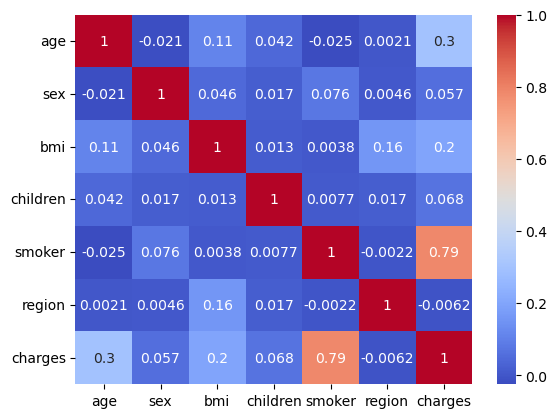

In [15]:
#constructing the heatnmao to find the correlation
hmap = dataset.select_dtypes(include = ['int64', 'float64'])
hmap_visual = hmap.corr()
sns.heatmap(hmap_visual, annot = True, cmap = 'coolwarm')
plt.show()

In [16]:
#so here i will bin the continuous age variable into categories and then visualize average insurance charges for each age group.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Step1: find minimum age in dataset

min_age = dataset['age'].min()
print("Minimum age in the dataset:", min_age)


# Step 2: create bins
bins = [17, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

# Step 2: assign age groups
dataset['age_group'] = pd.cut(dataset['age'], bins=bins, labels=labels, include_lowest=True)

# Step 3: check
dataset.head()


Minimum age in the dataset: 18


,age,sex,bmi,children,smoker,region,charges,age_group
0,19,0,27.900,0,1,3,16884.92400,18-25
1,18,1,33.770,1,0,2,1725.55230,18-25
2,28,1,33.000,3,0,2,4449.46200,26-35
3,33,1,22.705,0,0,1,21984.47061,26-35
4,32,1,28.880,0,0,1,3866.85520,26-35


In [17]:
#step 3 
# Group by age_group and calculate average charges
age_charges = dataset.groupby('age_group')['charges'].mean().reset_index()

#step 4

# Find the age group with the highest charge
highest = age_charges.loc[age_charges['charges'].idxmax()]
print("Highest average charge:")
print(highest)


# Find the age group with the lowest charge
lowest = age_charges.loc[age_charges['charges'].idxmin()]
print("\nLowest average charge:")
print(lowest)

#want each person in the original dataset to know the average charge of their age



Highest average charge:
age_group           56-65
charges      18795.993816
Name: 4, dtype: object

Lowest average charge:
age_group          18-25
charges      9087.015807
Name: 0, dtype: object


/var/folders/7k/qd1s4hb50zb75kblhq91_vbw0000gn/T/ipykernel_10923/1875796176.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_charges = dataset.groupby('age_group')['charges'].mean().reset_index()


In [18]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,0,27.900,0,1,3,16884.92400,18-25
1,18,1,33.770,1,0,2,1725.55230,18-25
2,28,1,33.000,3,0,2,4449.46200,26-35
3,33,1,22.705,0,0,1,21984.47061,26-35
4,32,1,28.880,0,0,1,3866.85520,26-35


Highest average charge:
age_group             56-65
charges_avg    18795.993816
Name: 4, dtype: object

Lowest average charge:
age_group            18-25
charges_avg    9087.015807
Name: 0, dtype: object


/var/folders/7k/qd1s4hb50zb75kblhq91_vbw0000gn/T/ipykernel_10923/570960739.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_charges = dataset.groupby('age_group')['charges'].mean().reset_index()
/var/folders/7k/qd1s4hb50zb75kblhq91_vbw0000gn/T/ipykernel_10923/570960739.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='charges_avg', data=age_charges, palette='viridis')


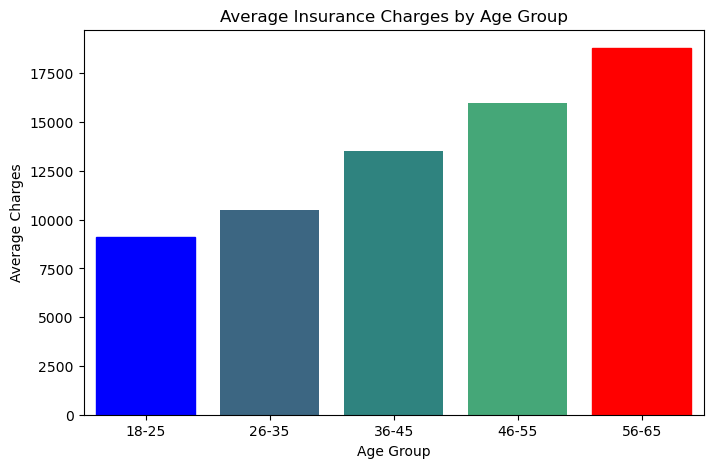

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ----- Step 0: Start fresh -----
# Keep only the original columns (drop any previous 'charges_avg' duplicates)
dataset = dataset[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]

# ----- Step 1: Bin ages into categories -----
bins = [17, 25, 35, 45, 55, 65]   # define age bins
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']  # labels for bins
dataset['age_group'] = pd.cut(dataset['age'], bins=bins, labels=labels, include_lowest=True)

# ----- Step 2: Compute average charges per age group -----
age_charges = dataset.groupby('age_group')['charges'].mean().reset_index()
age_charges.rename(columns={'charges': 'charges_avg'}, inplace=True)

# ----- Step 3: Merge the average charges back into the dataset -----
dataset = dataset.merge(age_charges, on='age_group', how='left')

# ----- Step 4: Identify highest and lowest average charges -----
highest = age_charges.loc[age_charges['charges_avg'].idxmax()]
lowest = age_charges.loc[age_charges['charges_avg'].idxmin()]

print("Highest average charge:")
print(highest)
print("\nLowest average charge:")
print(lowest)

# ----- Step 5: Plot average charges by age group -----
plt.figure(figsize=(8,5))
sns.barplot(x='age_group', y='charges_avg', data=age_charges, palette='viridis')

# Highlight highest and lowest bars
bars = plt.gca().patches
bars[age_charges['charges_avg'].idxmax()].set_color('red')   # highest
bars[age_charges['charges_avg'].idxmin()].set_color('blue')  # lowest

plt.title('Average Insurance Charges by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.show()


In [20]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges,age_group,charges_avg
0,19,0,27.900,0,1,3,16884.92400,18-25,9087.015807
1,18,1,33.770,1,0,2,1725.55230,18-25,9087.015807
2,28,1,33.000,3,0,2,4449.46200,26-35,10495.163047
3,33,1,22.705,0,0,1,21984.47061,26-35,10495.163047
4,32,1,28.880,0,0,1,3866.85520,26-35,10495.163047


In [21]:
#does being a smoker impact insurance charges? (EDA)

smoker_charges = dataset.groupby('smoker')['charges'].mean().reset_index()
smoker_charges.rename(columns={'charges': 'smoke_avg_charges'}, inplace=True)
print(smoker_charges)
dataset = dataset.merge(smoker_charges, on='smoker', how='left')
#so yes we can conclude that smoking does impact the charges

   smoker  smoke_avg_charges
0       0        8434.268298
1       1       32050.231832


In [22]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges,age_group,charges_avg,smoke_avg_charges
0,19,0,27.900,0,1,3,16884.92400,18-25,9087.015807,32050.231832
1,18,1,33.770,1,0,2,1725.55230,18-25,9087.015807,8434.268298
2,28,1,33.000,3,0,2,4449.46200,26-35,10495.163047,8434.268298
3,33,1,22.705,0,0,1,21984.47061,26-35,10495.163047,8434.268298
4,32,1,28.880,0,0,1,3866.85520,26-35,10495.163047,8434.268298


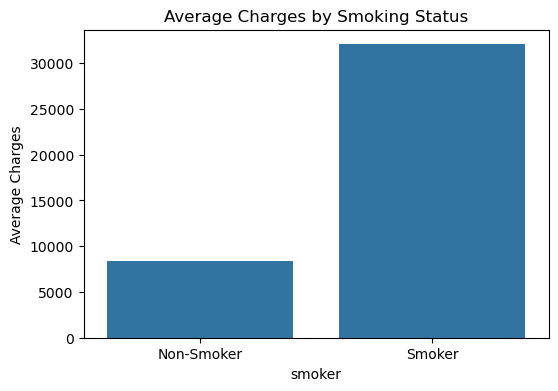

In [23]:
#lets see this visually

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(x='smoker', y='smoke_avg_charges', data=dataset)
plt.xticks([0,1], ['Non-Smoker', 'Smoker'])
plt.title('Average Charges by Smoking Status')
plt.ylabel('Average Charges')
plt.show()


In [24]:
#now lets bring back the total cost
#Add a new column for cost predicition
pred = pd.DataFrame(x_test)
pred['cost']=y_test
pred['predCost'] = y_pred
pred.head()

,age,sex,bmi,children,smoker,region,cost,predCost
764,45,0,25.175,2,0,0,9095.06825,8931.421164
887,36,0,30.020,0,0,1,5272.17580,7070.906703
890,64,0,26.885,0,1,1,29330.98315,36937.080496
1293,46,1,25.745,3,0,1,9301.89355,9596.992144
259,19,1,31.920,0,1,1,33750.29180,27008.354871


In [25]:
#I had to drop the predicted cost, previous command alredy added it to my dataset. 

dataset.drop(dataset.columns[[-1]], axis=1, inplace=True)

In [26]:
dataset

,age,sex,bmi,children,smoker,region,charges,age_group,charges_avg
0,19,0,27.900,0,1,3,16884.92400,18-25,9087.015807
1,18,1,33.770,1,0,2,1725.55230,18-25,9087.015807
2,28,1,33.000,3,0,2,4449.46200,26-35,10495.163047
3,33,1,22.705,0,0,1,21984.47061,26-35,10495.163047
4,32,1,28.880,0,0,1,3866.85520,26-35,10495.163047
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,46-55,15986.900310
1334,18,0,31.920,0,0,0,2205.98080,18-25,9087.015807
1335,18,0,36.850,0,0,2,1629.83350,18-25,9087.015807
1336,21,0,25.800,0,0,3,2007.94500,18-25,9087.015807


In [27]:
#lets determine the region with the highest insurance charge.

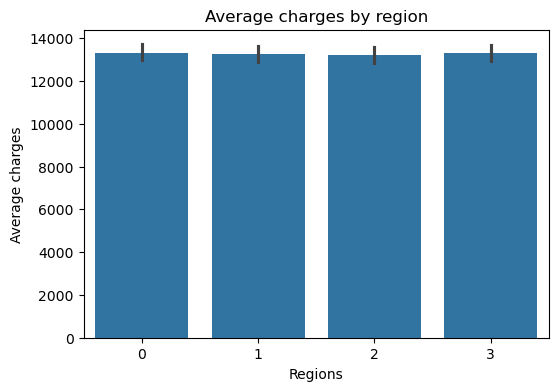

In [28]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.barplot(x = 'region', y = 'charges_avg', data = dataset)
plt.title ('Average charges by region')
plt.ylabel('Average charges')
plt.xlabel('Regions')
plt.show()

#i really dont like this one, so i will plot another inb the next cell

/var/folders/7k/qd1s4hb50zb75kblhq91_vbw0000gn/T/ipykernel_10923/3983500775.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='region', y='charges_avg', data=dataset, palette=palette)


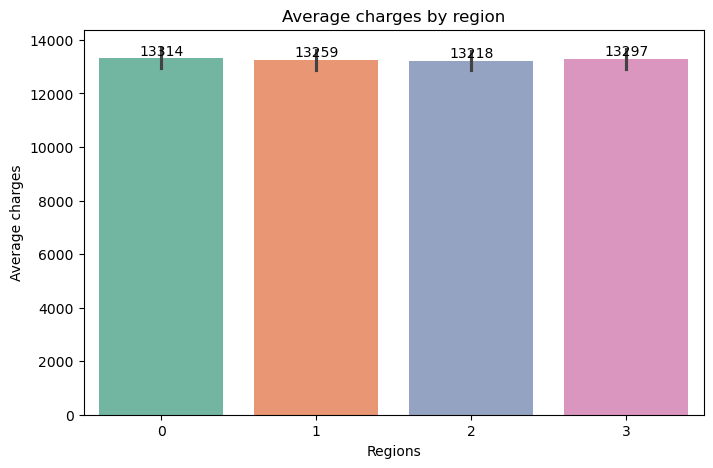

In [29]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# Different colors for each region
palette = sns.color_palette("Set2", n_colors=dataset['region'].nunique())

# Barplot with custom colors
ax = sns.barplot(x='region', y='charges_avg', data=dataset, palette=palette)

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',               # value, no decimal
                (p.get_x() + p.get_width() / 2., p.get_height()), # position
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Average charges by region')
plt.ylabel('Average charges')
plt.xlabel('Regions')
plt.show()


In [30]:
#region 0 is highest affected. So i need to determine something here.  region 0 is southwest. so if southwest is highest affected
#And we have determined smoking to highly impact these charges. so, could smoking be high in the south west region as compared to other region.



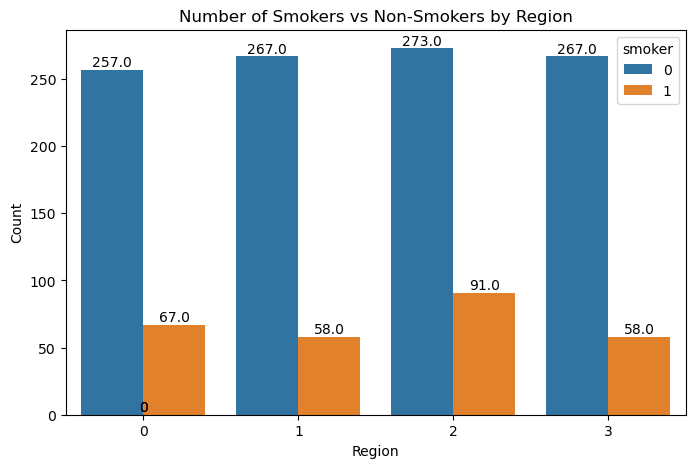

In [31]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='region', hue='smoker', data=dataset)

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.title("Number of Smokers vs Non-Smokers by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()


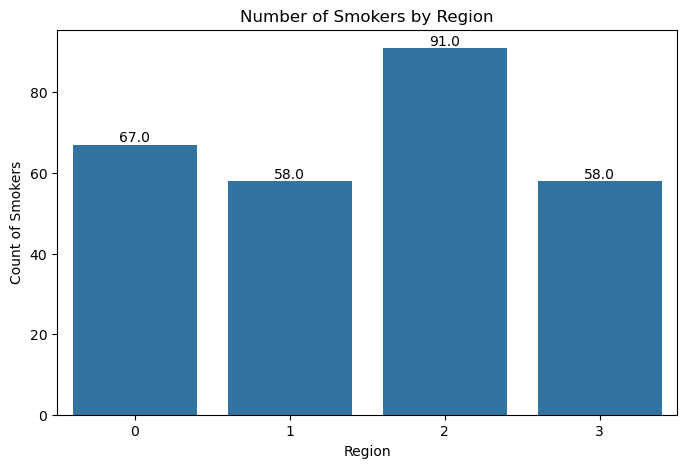

In [32]:
#for smokers only

smokers_only = dataset[dataset['smoker'] == 1]   # assuming 1 = smoker

plt.figure(figsize=(8,5))
ax = sns.countplot(x='region', data=smokers_only)

# Add counts on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.title("Number of Smokers by Region")
plt.xlabel("Region")
plt.ylabel("Count of Smokers")
plt.show()


In [33]:
#so na region 2 dey really smoke. #God abeg
#basically, no correlation between the region and smoking affects the insurance charges. although insurance charges are somewhat affected by smoking, this has nothing to do with the region of the smokers


#✅ Smoking itself is a strong driver of higher insurance charges (clear correlation).

#❌ Region doesn’t directly influence smoking’s effect on charges — meaning being from Region 2, 3, or 4 doesn’t make your smoking any more or less expensive in terms of charges.

#Instead, the smoking habit is the key factor, not the geographical location.

#In short:

#Region → Smoking (some regions have more smokers, true).

#But Region ↛ Charges (region itself doesn’t directly raise charges).

#Smoking → Charges (that’s where the big impact is).

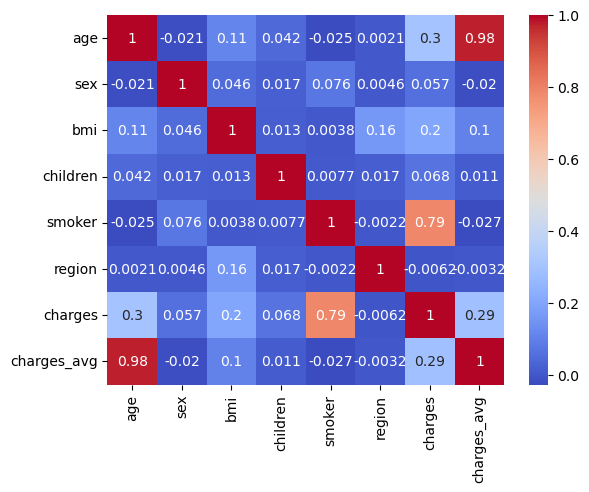

In [34]:
#to cement my point, lets bring back the correlation map. and see the correlation

#constructing the heatnmao to find the correlation
hmap = dataset.select_dtypes(include = ['int64', 'float64'])
hmap_visual = hmap.corr()
sns.heatmap(hmap_visual, annot = True, cmap = 'coolwarm')
plt.show()

#So you can see the correlation between smoker and region -0.0022.

#However, The main driver of higher charges is smoking, followed by age, then BMI.
#Everything else (sex, children, region) contributes very little.

In [35]:
#To take this futher, i will be using classification model to predict whether a person is a smoker or not, based on their other features
#So in this case smoker colum becomes my dependent Y.
#Aid : Decision Tree


In [36]:
#import libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

#loading data file
balance_data = pd.read_csv('/Users/macbook/Downloads/insurance.csv')

In [37]:
print('Dataset Length ::', len(balance_data))
print('Dataset shape :: ', balance_data.shape)

Dataset Length :: 1338
Dataset shape ::  (1338, 7)


In [38]:
balance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
#so now we have our dataset clean 
#ill proceed to set the variables X and Y (independent and dependent) but first i must convert the categorical data to numerical

In [40]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to be safe
encoded_data = balance_data.copy()

# Loop through columns and encode if column is object (string)
labelencoder = LabelEncoder()

for col in encoded_data.columns:
    if encoded_data[col].dtype == 'object':
        encoded_data[col] = labelencoder.fit_transform(encoded_data[col])


In [41]:
X = encoded_data.drop(encoded_data.columns[4], axis=1)
Y = encoded_data.iloc[:, 4]

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#Train Models

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, Y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [42]:
#create Function to make predictions.

#FunctiontomakePredictions
y_pred_en = clf_entropy.predict(X_test)
print(y_pred_en)

[0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 1 0]


In [43]:
#we have our leaf in 1 and 0. now i need to convert it to a yes/no

#f 1 = yes, if 0 = no

#I'll do this in three ways.

In [44]:
y_pred_labels = ['Yes' if val == 1 else 'No' for val in y_pred_en]
print(y_pred_labels)


['No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'N

In [45]:
#using numpy array

import numpy as np
y_pred_labels = np.where(y_pred_en == 1, 'Yes', 'No')
print(y_pred_labels)


['No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes'
 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No'
 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 

In [46]:
#using a function

def yes_no_converter(predictions):
    return ['Yes' if val == 1 else 'No' for val in predictions]

y_pred_labels = yes_no_converter(y_pred_en)
print(y_pred_labels)


['No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'N

In [47]:
#for clarity sake, i need to count the number of yes, and no, ill do that with a function and some spiced up dictionary

def count_yes_no(predictions):
    yes_count = np.count_nonzero(predictions == 1)
    no_count = np.count_nonzero(predictions == 0)
    return {'Yes': yes_count, 'No': no_count}


In [48]:
print(count_yes_no(y_pred_en))

{'Yes': 65, 'No': 203}


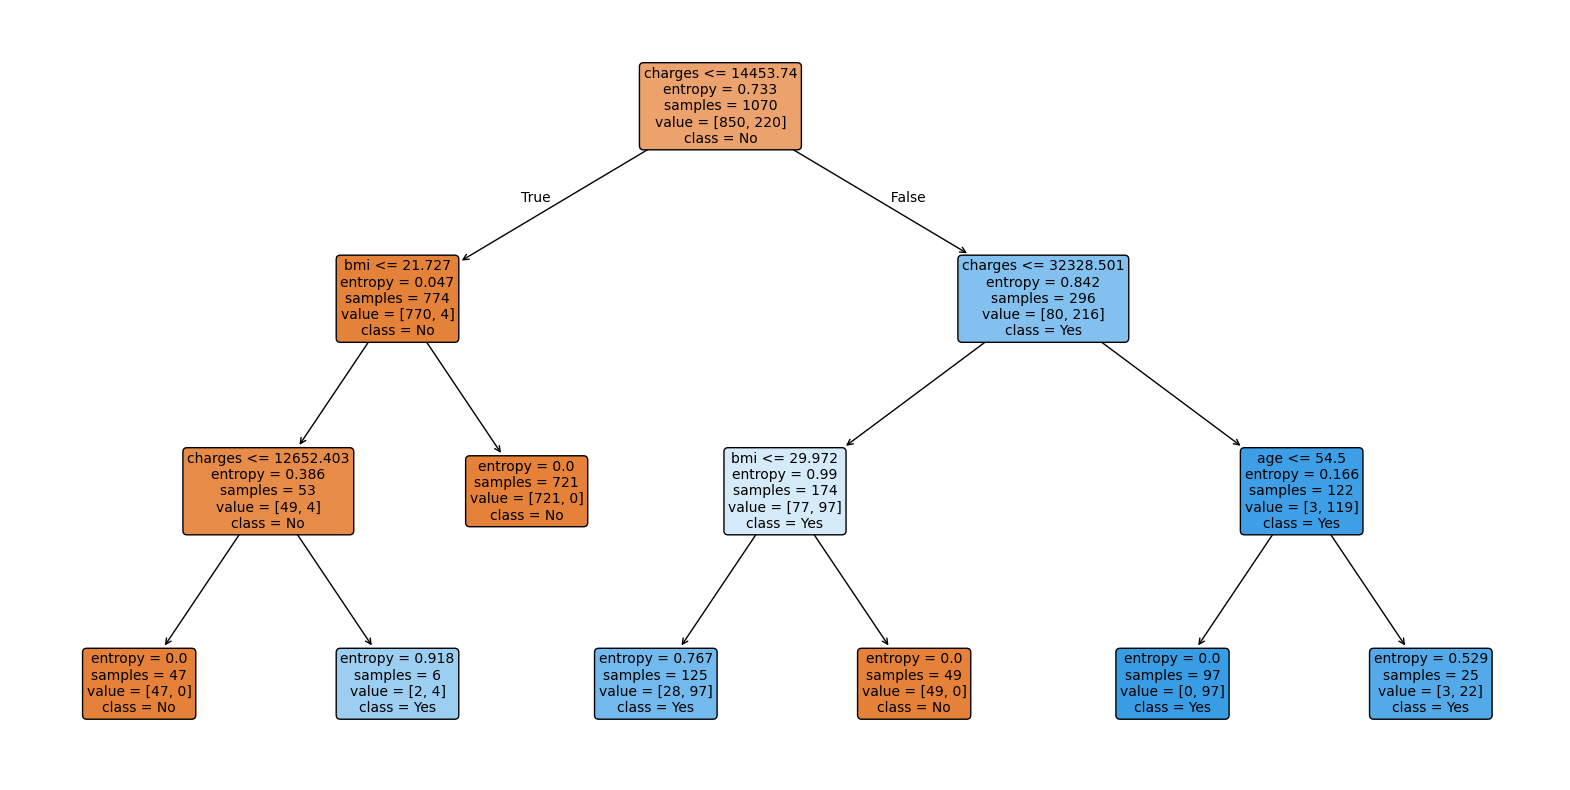

In [49]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    clf_entropy,                 # your trained decision tree model
    feature_names=X.columns,     # column names for better readability
    class_names=['No', 'Yes'],   # target labels
    filled=True,                 # color the nodes
    rounded=True,                # rounded edges
    fontsize=10
)
plt.show()


#using decision tree Algo, i am teaching the model to answer, Given this person’s details(other attributes), will they be a smoker (Yes or No).


#a binary classification model to predict whether a person is a smoker or not, based on their other features:
#age
#sex
#bmi
#children
#Charges

In [50]:
#Root Node Explained.

#charges <= 14453.74
#entropy = 0.733
#samples = 1070
#value = [850, 220]
#class = No
'''The first question my model asks is:
“Are this person’s medical charges less than or equal to 14,453.74?”

Out of 1070 total people:

850 are non-smokers (No)

220 are smokers (Yes)

Because there are more Nos, the class = No.

So people with low charges are generally non-smokers'''

#So why 14,453.74, this is a boundary or borderline Below 14,453 → mostly people with low medical expenses = non-smokers

#Above 14,453 → medical bills start climbing = smokers
#It gives the highest information gain — best separation of smokers vs non-smokers


'The first question my model asks is:\n“Are this person’s medical charges less than or equal to 14,453.74?”\n\nOut of 1070 total people:\n\n850 are non-smokers (No)\n\n220 are smokers (Yes)\n\nBecause there are more Nos, the class = No.\n\nSo people with low charges are generally non-smokers'

In [51]:
# ill Check the closest charge values around the split point 14453.74
split_value = 14453.74

# Step 2: Sort the dataset by 'charges'
df_sorted = balance_data.sort_values(by='charges')

# Step 3: Find the closest values below and above the split
lower = df_sorted[df_sorted['charges'] <= split_value].tail(3)
upper = df_sorted[df_sorted['charges'] > split_value].head(3)

print("Closest values BELOW or equal to split:")
print(lower[['charges', 'smoker']])
print("\nClosest values ABOVE split:")
print(upper[['charges', 'smoker']])



Closest values BELOW or equal to split:
          charges smoker
1157  14426.07385     no
1236  14449.85440     no
26    14451.83515     no

Closest values ABOVE split:
          charges smoker
412   14455.64405    yes
962   14474.67500     no
1272  14478.33015     no


In [52]:
#so another quick explanation to how the algo picked the number 14453.74 4453.74 comes from the charges column in your dataset.
#It’s not a random number, it’s a split point chosen by the decision tree algorithm
#when it tries to decide “how to best separate smokers from non-smokers based on their charges.”

#clf_entropy.fit(X_train, Y_train).  

#scikit-learn’s decision tree internally does the following for each numeric feature (like charges):

#Sorts the unique values of that feature (say all unique charges values).

#Then for each possible split point, it tries dividing the data into:

#Left side → rows where charges <= that_split_value

#Right side → rows where charges > that_split_value

#For each possible split, it calculates a score (e.g. entropy or information gain).

#It then chooses the split point that gives the best separation between classes (yes vs no).

#So 14453.74 is the point where the tree found the best division — the one that best separates “smokers” from “non-smokers” based on their charges.

In [53]:
#🌿 LEFT BRANCH (True path → charges ≤ 14453.74)
#bmi <= 21.727
#entropy = 0.047
#samples = 774
#value = [770, 4]
#class = No


#👉🏽 The model now asks:

#“For those with low charges, is their BMI ≤ 21.7?”

#770 of them are non-smokers, only 4 are smokers.

#That means low charges + low BMI = almost certainly non-smoker.
#So this branch is all orange (class = No).

In [54]:
#🍂 LEFT-LEFT Branch (bmi ≤ 21.727)

#charges <= 12652.403
#entropy = 0.386
#samples = 53
#value = [49, 4]
#class = No


#That’s even more specific:

#“If BMI ≤ 21.7 and charges ≤ 12,652 still mostly nonsmokers.”

#✅ Bottom line: all those nodes in orange are no-smokers.

In [59]:
#RIGHT BRANCH (charges > 14453.74)
#charges <= 32328.501
#entropy = 0.842
#samples = 296
#value = [80, 216]
#class = Yes

'''Now this side of the tree is more blue  meaning mostly smokers.

So my model’s rule is:

“If someone has high medical charges, it’s more likely they’re a smoker.”

'This makes sense  smokers tend to have higher medical bills.Now this side of the tree is more blue  meaning mostly smokers'.'''


"Now this side of the tree is more blue  meaning mostly smokers.\n\nSo my model’s rule is:\n\n“If someone has high medical charges, it’s more likely they’re a smoker.”\n\n'This makes sense  smokers tend to have higher medical bills.Now this side of the tree is more blue  meaning mostly smokers'."

In [ ]:
#bmi <= 29.972

#Still splits smokers by BMI.

#People with lower BMI (≤ 29.9) and high charges are mixed, but most are still smokers.

#age <= 54.5

#Among people with high charges and high BMI, younger ones (≤ 54.5) are very likely to be smokers.

In [ ]:
#LEAF NODES (Bottom boxes)

#Each bottom box is a final decision:

#Orange boxes = predicted No (non-smoker)

#Blue boxes = predicted Yes (smoker)

#“entropy = 0.0” means it’s pure — all people at that node belong to one class.

#model basically learned:

#Low charges → not smoker

#High charges → smoker

#Within high charges, BMI and age help fine-tune who’s most likely to smoke